## import packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data

In [2]:
file_path = 'C:/Data_set/'

In [3]:
salesdata = pd.read_csv(file_path+'SalesData.csv')

In [4]:
salesdata

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [5]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [6]:
salesdata.describe()

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
mean,7.716535e+04,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000
max,1.219499e+06,145760.120000,168033.360000,53.000000,61.00000,1.420000,1.570000


# 1

In [7]:
sal=pd.DataFrame(salesdata.groupby('Region')[['Sales2015','Sales2016']].sum())

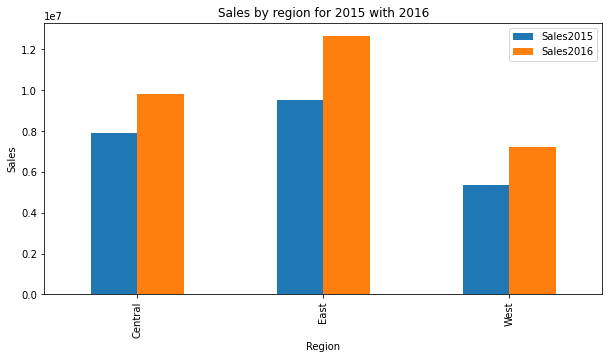

In [8]:
sal.plot(kind='bar', figsize=(10,5), title='Sales by region for 2015 with 2016', 
         legend=True, xlabel='Region', ylabel='Sales')
plt.show()

# 2

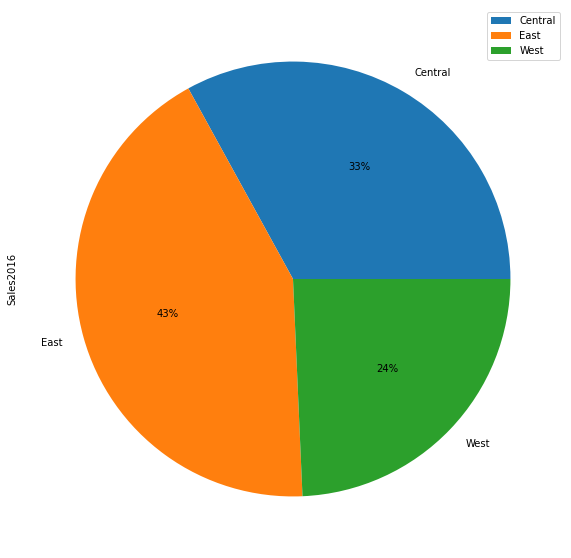

In [9]:
pd.DataFrame(salesdata.groupby(['Region'])['Sales2016'].sum()).plot(kind='pie', 
                                                                    subplots=True,
                                                                    figsize=(10,10),
                                                                    autopct = '%1.f%%',
                                                                    legend=True)
plt.show()

# 3

In [10]:
ss = salesdata.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum()

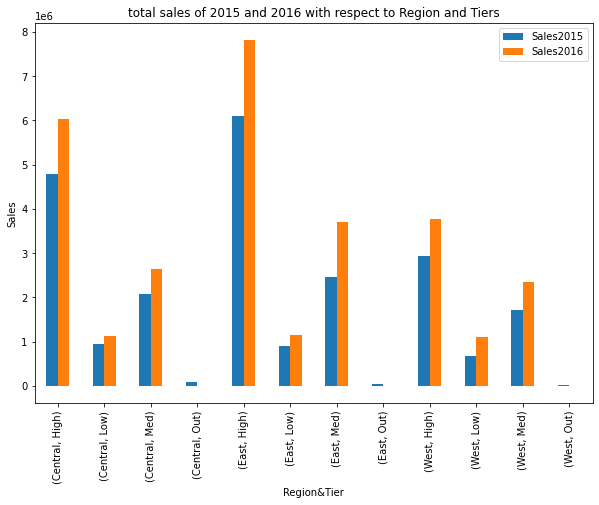

In [11]:
ss.plot(kind='bar', figsize=(10,7), legend=True, 
        title = 'total sales of 2015 and 2016 with respect to Region and Tiers', 
        xlabel='Region&Tier', ylabel='Sales')
plt.show()

# 4

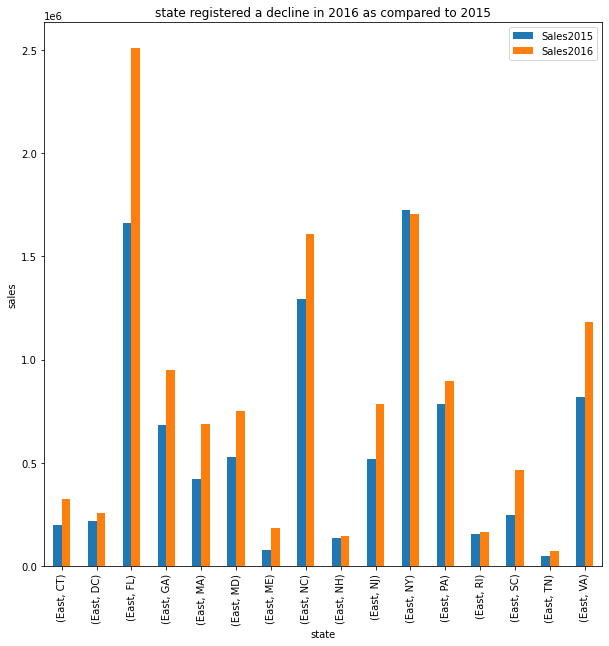

NY-State registered a decline in 2016


In [12]:
(salesdata[salesdata.Region=='East'].groupby(['Region', 'State'])[['Sales2015', 'Sales2016']].sum()).plot(kind='bar', 
                                                                                                          figsize=(10,10), 
                                                                                                          title='state registered a decline in 2016 as compared to 2015', 
                                                                                                          xlabel='state', 
                                                                                                          ylabel='sales')
plt.show()
print('NY-State registered a decline in 2016')

# 5

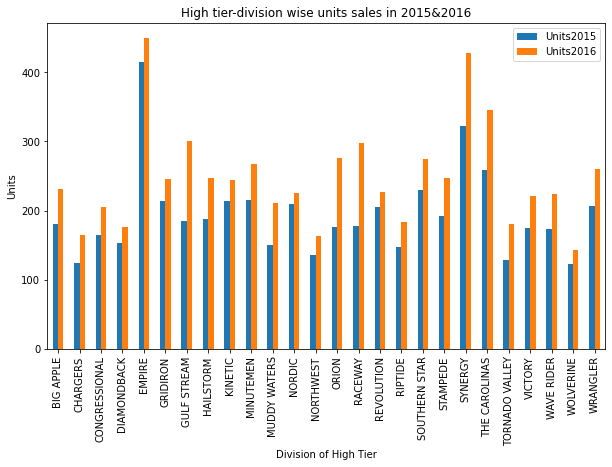

no division saw decline in number of unit sold


In [13]:
(salesdata[salesdata.Tier=='High'].groupby('Division')[['Units2015','Units2016']].sum()).plot(kind='bar',
                                                                                             figsize=(10,6),
                                                                                             title='High tier-division wise units sales in 2015&2016',
                                                                                              xlabel='Division of High Tier',
                                                                                              ylabel='Units')
plt.show()
print('no division saw decline in number of unit sold')

# 6

In [14]:
cond=[((salesdata.Month == 'Jan')| (salesdata.Month == 'Feb') | (salesdata.Month == 'Mar')),
     ((salesdata.Month == 'Apr') | (salesdata.Month == 'May') | (salesdata.Month == 'Jun')),
     ((salesdata.Month == 'Jul') | (salesdata.Month == 'Aug') | (salesdata.Month == 'Sep')),
     ((salesdata.Month == 'Oct') | (salesdata.Month == 'Nov') | (salesdata.Month == 'Dec'))]

In [15]:
val= [('Q1'), ('Q2'), ('Q3'), ('Q4')]

In [16]:
salesdata['Quter'] = np.select(cond,val )

In [17]:
salesdata

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quter
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


# 7

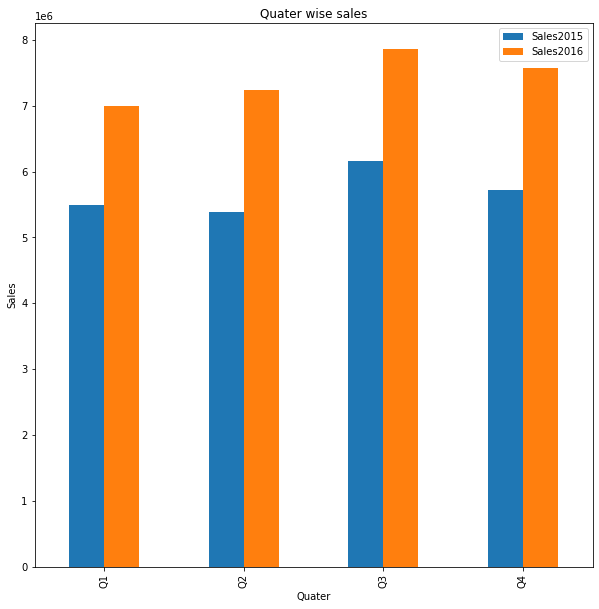

In [18]:
(salesdata.groupby('Quter')[['Sales2015', 'Sales2016' ]].sum()).plot(kind='bar', figsize=(10,10), 
                                                                     xlabel='Quater', 
                                                                     ylabel='Sales', 
                                                                     title='Quater wise sales',
                                                                    legend = True)
plt.show()

# 8

In [32]:
sss=pd.DataFrame(salesdata.groupby(['Quter', 'Tier'])['Sales2016'].sum()).reset_index()

In [33]:
s=sss.pivot(index='Quter', columns='Tier', values='Sales2016')

In [34]:
s

Tier,High,Low,Med,Out
Quter,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.00
Q2,4130952.560,890594.75,2.215814e+06,0.00
Q3,4872559.250,795177.71,2.197058e+06,-3248.53
Q4,4740001.985,742659.39,2.085207e+06,0.00


In [40]:
s['Out'][2]=-1*-3248.53

In [41]:
s

Tier,High,Low,Med,Out
Quter,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.00
Q2,4130952.560,890594.75,2.215814e+06,0.00
Q3,4872559.250,795177.71,2.197058e+06,3248.53
Q4,4740001.985,742659.39,2.085207e+06,0.00


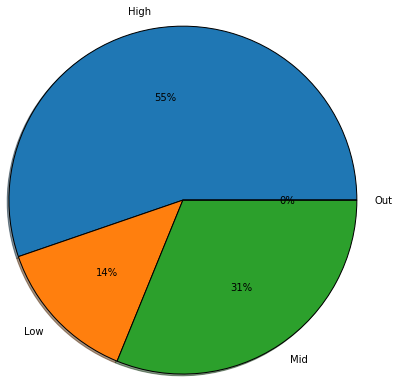

In [22]:
plt.pie(x=s.loc["Q1",:], autopct="%1.0f%%", labels= ['High', 'Low', 'Mid', 'Out'], 
        radius = 2, shadow=True,  wedgeprops={'edgecolor': 'black'})
plt.show()

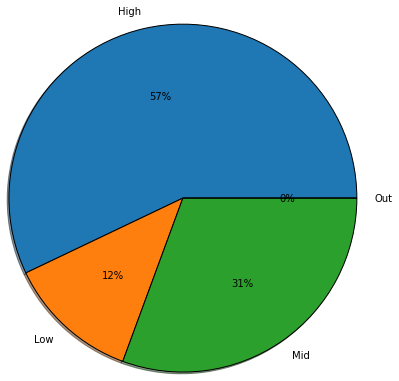

In [23]:
plt.pie(x=s.loc["Q2",:], autopct="%1.0f%%", labels= ['High', 'Low', 'Mid', 'Out'], radius = 2, shadow=True,  wedgeprops={'edgecolor': 'black'})
plt.show()

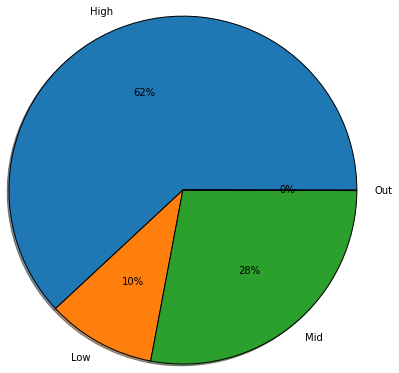

In [42]:
plt.pie(x=s.loc["Q3",:], autopct="%1.0f%%", labels= ['High', 'Low', 'Mid', 'Out'], radius = 2, 
        shadow=True,  wedgeprops={'edgecolor': 'black'})
plt.show()

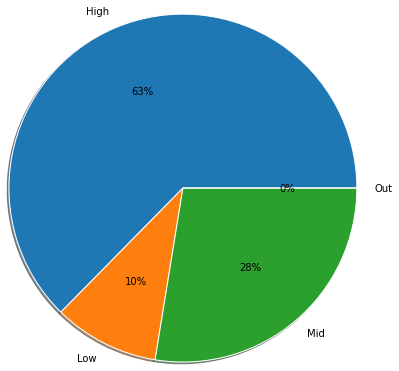

In [43]:
plt.pie(x=s.loc["Q4",:], autopct="%1.0f%%", labels= ['High', 'Low', 'Mid', 'Out'], radius = 2, shadow=True,  wedgeprops={'edgecolor': 'white'})
plt.show()